In [13]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

def remove_categorical_columns(df):
    df.drop('MSZoning',axis=1,inplace=True)
    df.drop('Street',axis=1,inplace=True)
    df.drop('Alley',axis=1,inplace=True)
    df.drop('LotShape',axis=1,inplace=True)
    df.drop('LandContour',axis=1,inplace=True)
    df.drop('Utilities',axis=1,inplace=True)
    df.drop('LotConfig',axis=1,inplace=True)
    df.drop('LandSlope',axis=1,inplace=True)
    df.drop('Neighborhood',axis=1,inplace=True)
    df.drop('Condition1',axis=1,inplace=True)
    df.drop('Condition2',axis=1,inplace=True)
    df.drop('BldgType',axis=1,inplace=True)
    df.drop('HouseStyle',axis=1,inplace=True)
    df.drop('RoofStyle',axis=1,inplace=True)
    df.drop('RoofMatl',axis=1,inplace=True)
    df.drop('Exterior1st',axis=1,inplace=True)
    df.drop('Exterior2nd',axis=1,inplace=True)
    df.drop('MasVnrType',axis=1,inplace=True)
    df.drop('ExterQual',axis=1,inplace=True)
    df.drop('ExterCond',axis=1,inplace=True)
    df.drop('Foundation',axis=1,inplace=True)
    df.drop('BsmtQual',axis=1,inplace=True)
    df.drop('BsmtCond',axis=1,inplace=True)
    df.drop('BsmtExposure',axis=1,inplace=True)
    df.drop('BsmtFinType1',axis=1,inplace=True)
    df.drop('BsmtFinType2',axis=1,inplace=True)
    df.drop('Heating',axis=1,inplace=True)
    df.drop('HeatingQC',axis=1,inplace=True)
    df.drop('CentralAir',axis=1,inplace=True)
    df.drop('Electrical',axis=1,inplace=True)
    df.drop('KitchenQual',axis=1,inplace=True)
    df.drop('Functional',axis=1,inplace=True)
    df.drop('FireplaceQu',axis=1,inplace=True)
    df.drop('GarageType',axis=1,inplace=True)
    df.drop('GarageFinish',axis=1,inplace=True)
    df.drop('GarageQual',axis=1,inplace=True)
    df.drop('GarageCond',axis=1,inplace=True)
    df.drop('PavedDrive',axis=1,inplace=True)
    df.drop('PoolQC',axis=1,inplace=True)
    df.drop('Fence',axis=1,inplace=True)
    df.drop('MiscFeature',axis=1,inplace=True)
    df.drop('SaleType',axis=1,inplace=True)
    df.drop('SaleCondition',axis=1,inplace=True)

def input_missing_value(df):
    
    
    #LotFrontage - insert the mean 
    imp = Imputer(missing_values='NaN', strategy='mean', axis=1)
    #print(np.shape(df['LotFrontage']))
    df['LotFrontage'] = imp.fit_transform(df['LotFrontage']).transpose()    
   
    #Alley
    df.Alley.fillna(inplace=True,value='No')

    #MasVnrType - remove the records where the value is NA
    #print("Number of lines where MasVnrType has Nan value", len(df[df['MasVnrType'].isnull()]))
    #df.dropna(axis=0,subset=['MasVnrType'],inplace=True)
    #print("Number of lines where MasVnrType has Nan value",len(df[df['MasVnrType'].isnull()]))
    df.drop('MasVnrType',axis=1,inplace=True)
    
    #MasVnrArea - remove the hole column
    df.drop('MasVnrArea',axis=1,inplace=True)
    
    #Condition2 - remove the hole column Possui quantidade de tipos diferentes na base de treino e teste e apenas 
    #um dos tipos é relevante    
    df.drop('Condition2',axis=1,inplace=True)
    
    #RoofMatl - remove the hole column Possui quantidade de tipos diferentes na base de treino e teste e apenas 
    #um dos tipos é relevante    
    df.drop('RoofMatl',axis=1,inplace=True)
    

    #MSZoning   - tem NA apenas na base de teste. Como nao posso remover linhas removo a coluna   
    #df.dropna(axis=0,subset=['MSZoning'],inplace=True)
    df.drop('MSZoning',axis=1,inplace=True)
    
    #BsmtQual
    df.BsmtQual.fillna(inplace=True,value='No')
    
    #HouseStyle - Esse valor so existe na base de treino. Ao inves de remover toda coluna removo somente as linhas 
    df.drop(df[df.HouseStyle=='2.5Fin'].index,inplace=True)
    
    #BsmtCond
    df.BsmtCond.fillna(inplace=True,value='No')

    #BsmtExposure
    df.BsmtExposure.fillna(inplace=True,value='No')

    #BsmtFinType1
    df.BsmtFinType1.fillna(inplace=True,value='No')

    #BsmtFinType2
    df.BsmtFinType2.fillna(inplace=True,value='No')

    #Electrical - remove the records where the value is NA
    #print("Number of lines where Electrical has Nan value",len(df[df['Electrical'].isnull()]))
    df.dropna(axis=0,subset=['Electrical'],inplace=True) # apenas no treino 
    df.drop(df[df.Electrical=='Mix'].index,inplace=True) # apenas no treino
    #print("Number of lines where Electrical has Nan value",len(df[df['Electrical'].isnull()]))

    #FireplaceQu
    df.FireplaceQu.fillna(inplace=True,value='No')
    

    #GarageType
    df.GarageType.fillna(inplace=True,value='No')

    #GarageYrBlt - remove the hole column
    df.drop('GarageYrBlt',axis=1,inplace=True)

    #GarageFinish
    df.GarageFinish.fillna(inplace=True,value='No')

    #GarageQual - A base de teste nao tem um dos tipos presente na base de treino. Assim a base de treino terá uma 
    #feature para esse tipo e a de teste não. Alem disso, apenas um tipo é pertinente
    #Achei melhor entao excluir essa coluna    
    df.drop('GarageQual',axis=1,inplace=True)
    #df.drop(df[df.GarageQual=='Ex'].index,inplace=True)
    
    #GarageCond
    df.GarageCond.fillna(inplace=True,value='No')

    #PoolQC
    #df.PoolQC.fillna(inplace=True,value='No')
    df.drop('PoolQC',axis=1,inplace=True)
    
    #Fence
    df.Fence.fillna(inplace=True,value='No')

    #MiscFeature
    #df.MiscFeature.fillna(inplace=True,value='No')
    df.drop('MiscFeature',axis=1,inplace=True)

    #MiscVal
    df.drop('MiscVal',axis=1,inplace=True)
    
    #SaleType
    df.drop('SaleType',axis=1,inplace=True)
    
    #Exterior1st- nao posso remover linhas do teste
    #df.dropna(axis=0,subset=['Exterior1st'],inplace=True)     
    #df.drop(df[df.Exterior1st=='Stone'].index,inplace=True)
    #df.drop(df[df.Exterior1st=='ImStucc'].index,inplace=True)
    #df.drop(df[df.Exterior1st=='CBlock'].index,inplace=True)
    df.drop('Exterior1st',axis=1,inplace=True)
    
    #Exterior2nd
    #df.dropna(axis=0,subset=['Exterior2nd'],inplace=True)
    #df.Exterior2nd.fillna(inplace=True,value= 'Other')
    #df.drop(df[df.Exterior2nd=='Other'].index,inplace=True)
    #df.drop(df[df.Exterior2nd=='CBlock'].index,inplace=True)
    df.drop('Exterior2nd',axis=1,inplace=True)
    
    #Heating -- esses tipos existem apenas na base de treino
    df.drop(df[df.Heating=='OthW'].index,inplace=True)
    df.drop(df[df.Heating=='Floor'].index,inplace=True)
    
    #KitchenQual
    #df.dropna(axis=0,subset=['KitchenQual'],inplace=True)
    df.KitchenQual.fillna(inplace=True,value='Fa') #- Apenas a base de teste tem NA e como nao posso remover registro
    #dessa base setei o valor menos comum
    
    #Functional
    #df.dropna(axis=0,subset=['Functional'],inplace=True)
    df.drop('Functional',axis=1,inplace=True)
    
    #Utilities
    df.drop('Utilities',axis=1,inplace=True)
    
    #BsmtFinSF1
    #df.dropna(axis=0,subset=['BsmtFinSF1'],inplace=True)
    df['BsmtFinSF1'] = imp.fit_transform(df['BsmtFinSF1']).transpose()    
    
    #BsmtFinSF2
    #df.dropna(axis=0,subset=['BsmtFinSF2'],inplace=True)
    df['BsmtFinSF2'] = imp.fit_transform(df['BsmtFinSF2']).transpose()    
    
    #BsmtUnfSF
    #df.dropna(axis=0,subset=['BsmtUnfSF'],inplace=True)
    df.drop('BsmtUnfSF',axis=1,inplace=True)
    
    #TotalBsmtSF
    #df.dropna(axis=0,subset=['TotalBsmtSF'],inplace=True)
    df['TotalBsmtSF'] = imp.fit_transform(df['TotalBsmtSF']).transpose()    
    
    #BsmtFullBath - apenas na base de teste tem NA.Nao posso remover a linha
    df.BsmtFullBath.fillna(inplace=True,value='0')
    
    #BsmtHalfBath- apenas na base de teste tem NA.Nao posso remover a linha
    df.BsmtHalfBath.fillna(inplace=True,value='0')
    
    #GarageCars
    #df.dropna(axis=0,subset=['GarageCars'],inplace=True)
    df.GarageCars.fillna(value='0',inplace=True)
    
    #GarageArea
    #df.dropna(axis=0,subset=['GarageArea'],inplace=True)
    df.GarageArea.fillna(value='0',inplace=True)
    
df = pd.read_csv("train.csv",na_values=['?','NA'],delimiter=',',delim_whitespace=False)
df_test = pd.read_csv("test.csv",na_values=['?','NA'],delimiter=',',delim_whitespace=False)

print(df.shape)
print(df_test.shape)
#print(df.head())
#print(df.describe())
print(df.dtypes)
#df = df.dropna()




from sklearn.preprocessing import Imputer

########################Dealing with missing values

#missing data
# total = df.isnull().sum().sort_values(ascending=False)
# percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
# missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# print(missing_data.head(20))

# 
#               Total   Percent
# PoolQC         1453  0.995205
# MiscFeature    1406  0.963014
# Alley          1369  0.937671
# Fence          1179  0.807534
# FireplaceQu     690  0.472603
# LotFrontage     259  0.177397
# GarageCond       81  0.055479
# GarageType       81  0.055479
# GarageYrBlt      81  0.055479
# GarageFinish     81  0.055479
# GarageQual       81  0.055479
# BsmtExposure     38  0.026027
# BsmtFinType2     38  0.026027
# BsmtFinType1     37  0.025342
# BsmtCond         37  0.025342
# BsmtQual         37  0.025342
# MasVnrArea        8  0.005479
# MasVnrType        8  0.005479
# Electrical        1  0.000685
# Utilities         0  0.000000



#print(df.columns[df.isnull().any()])
#'LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
#       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
#       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
#       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
#       'MiscFeature'
input_missing_value(df)


#print(df_test.columns[df_test.isnull().any()])
#Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
#       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
#       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
#      'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
#       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
#      'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
#       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
#       'SaleType'],

input_missing_value(df_test)

#Valores numericos que continham NA sao detectados como String. Assim, depois que removemos o NA temos que setar corretamente 
#o tipo 
df_test.BsmtFullBath = df_test.BsmtFullBath.astype("int64")
df_test.BsmtHalfBath = df_test.BsmtHalfBath.astype("int64")
df_test.GarageCars = df_test.GarageCars.astype("int64")
df_test.GarageArea = df_test.GarageArea.astype("int64")

print(df.shape)
print(df_test.shape)

########################End dealing with missing values


# The OneHotEncoder converts features represented as numeric codes (so they are values that can't be ordered) to their binary representation
#enc = preprocessing.OneHotEncoder() 
#aux = enc.fit_transform(data_train)


########################Tratando campos nominais

vec = DictVectorizer()
aux = np.asmatrix(vec.fit_transform(df.transpose().to_dict().values()).toarray())

data_train = pd.DataFrame(aux,columns=vec.feature_names_)
#data_train = pd.get_dummies(df)


data_train.to_csv('train_no_categorical.csv')

print("New shape train:" , np.shape(data_train))
print("Indice da coluna SalePrice no novo dataset" , data_train.columns.get_loc('SalePrice'))

################################################# Base de teste

vec = DictVectorizer()
aux_test = vec.fit_transform(df_test.transpose().to_dict().values()).toarray()
data_test = pd.DataFrame(aux_test,columns=vec.feature_names_)
#data_test = pd.get_dummies(df_test)
 
print("New shape test:" , np.shape(data_test))

data_test.to_csv('test_no_categorical.csv')


print("Colunas que existem apenas teste : " , data_test.columns.difference(data_train.columns))


(1460, 81)
(1459, 80)
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
Gar

count      1447.000000
mean     180944.330339
std       79185.190380
min       34900.000000
25%      130000.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


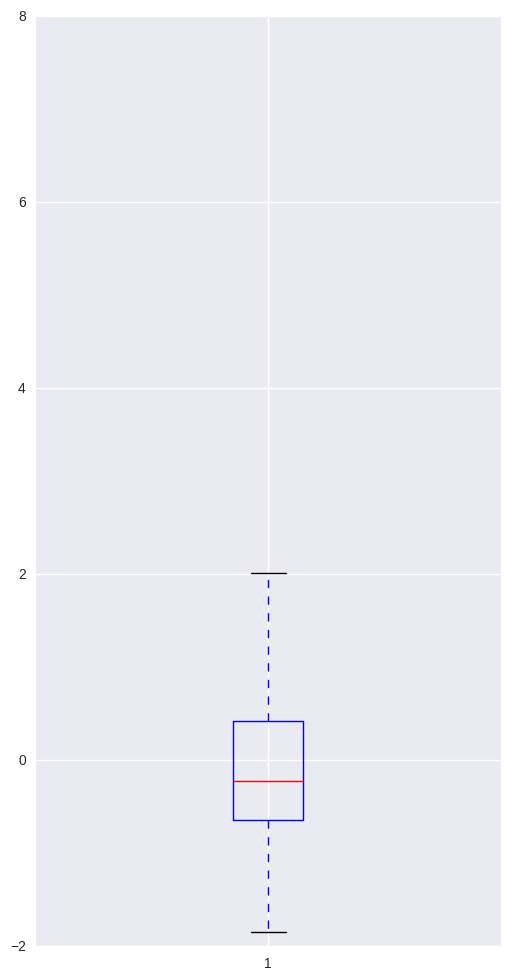

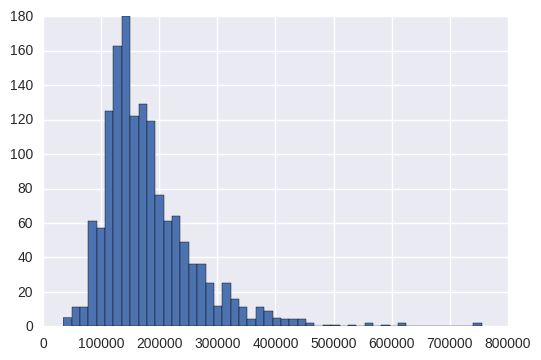

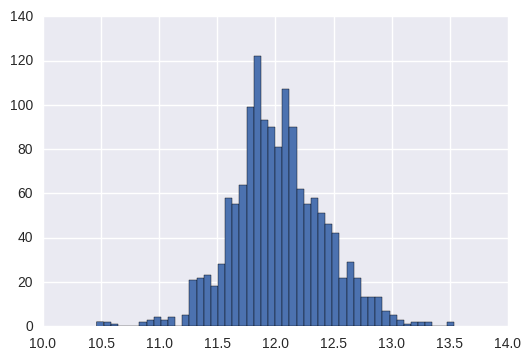

In [14]:
from scipy.stats import norm
from scipy import stats


print(df.SalePrice.describe())

saleprice_scaled = preprocessing.StandardScaler().fit_transform((df['SalePrice'][:,np.newaxis]));
fig = plt.figure(1, figsize=(6, 12))
#ax = fig.add_subplot(111)
#ax.boxplot(saleprice_scaled)
plt.boxplot(saleprice_scaled)

plt.figure()
x = plt.hist(df['SalePrice'],bins=50)

plt.figure()
saleprice_log = np.log(df['SalePrice'])
x = plt.hist(saleprice_log,bins=50)

#df['SalePrice'] = np.log(df['SalePrice'])
#df_test['SalePrice'] = np.log(df_test['SalePrice'])

In [15]:
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df,name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name,x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)
    





In [16]:
print("\n Tentativa de selecionar melhores features \n")

from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel


#Removing features with low variance
#print("Original shape: {}".format(np.shape(df.iloc[:,0:-1])))
#sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
#features = sel.fit_transform(df.iloc[:,0:-1])
#print("Shape apos Removing features with low variance {}".format(np.shape(features))) #nenhuma foi selecionada 
#print("\n")

#Tree-based feature selection
y_train = (data_train['SalePrice'])
x_train = (data_train.drop('SalePrice',axis=1))

clf = ExtraTreesRegressor()
clf = clf.fit(x_train,y_train)
data = np.zeros((1,x_train.shape[1])) 
data = pd.DataFrame(data, columns=x_train.columns)
data.iloc[0] = clf.feature_importances_
data = data.T.sort_values(df.index[0], ascending=False).T


print("As features selecionadas com Tree-based feature selection foram: \n")
yyy = np.asarray((data.columns[0:25]))
xxx = np.asarray((data.iloc[:,0:25]))
print(yyy)
print(xxx)

model = SelectFromModel(clf, prefit=True)
aux = model.transform(x_train)

print("\n New shape train apos Tree-based feature selection: {}".format(aux.shape))

print("\n Fim tentativa selecionar melhores features \n")


data_train_less_features = pd.concat([pd.DataFrame(aux),pd.DataFrame(y_train)],axis=1)
data_train_less_features.to_csv('data_train_less_features.csv')


aux = model.transform((data_test))
data_test_less_features = pd.DataFrame(aux)
print("\n New shape test apos Tree-based feature selection: {}".format(aux.shape))
data_test_less_features.to_csv('data_test_less_features.csv')

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn   import metrics
from sklearn.model_selection import train_test_split


 Tentativa de selecionar melhores features 

As features selecionadas com Tree-based feature selection foram: 

['ExterQual=TA' 'BsmtQual=Ex' 'OverallQual' 'GrLivArea' 'GarageCars'
 'FireplaceQu=No' 'FullBath' 'Neighborhood=NoRidge' '1stFlrSF' '2ndFlrSF'
 'GarageArea' 'Fireplaces' 'BsmtFinSF1' 'LotArea' 'TotalBsmtSF'
 'TotRmsAbvGrd' 'BsmtFinType1=GLQ' 'YearRemodAdd' 'YearBuilt' 'BsmtQual=Gd'
 'LotFrontage' 'BldgType=1Fam' 'BsmtExposure=Gd' 'ExterQual=Fa' 'HalfBath']
[[ 0.29182382  0.1115427   0.10393447  0.07373928  0.06535079  0.03346214
   0.02486973  0.02065555  0.01931133  0.01850605  0.01129692  0.01015791
   0.00951359  0.00930044  0.0090668   0.00851093  0.00733696  0.00689751
   0.00664215  0.00634419  0.0059271   0.00541231  0.00507997  0.00474002
   0.00424938]]

 New shape train apos Tree-based feature selection: (1447, 23)

 Fim tentativa selecionar melhores features 


 New shape test apos Tree-based feature selection: (1459, 23)


In [17]:
#Starting making predictors

from sklearn.linear_model import LinearRegression, SGDRegressor

#Caso 1 - Linear Regression 
print("Caso 1 - Linear Regression ")

# Shuffle
np.random.seed(42)
data_train = data_train.reindex(np.random.permutation(data_train.index))
data_train.reset_index(inplace=True, drop=True)


#Normalization
y_train = ((data_train['SalePrice']))
x_train = (data_train.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train_scaled = scaler.transform((x_train))


classifier = LinearRegression()
kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    

# The mean squared error
#pred = classifier.predict(x_test_scaled)
#score = metrics.mean_squared_error(y_test, pred)
#print("Final, out of sample score (RMSE): {}".format(score))    

# Evaluate success using accuracy
#print("Final Accuracy: %.3f" % classifier.score(X=x_test_scaled,y=y_test))



print("\n\n")
print("SGDRegressor \n\n")

classifier = SGDRegressor()

kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    

###########Less features

print("\n\n Less Features")
#Normalization
y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train = scaler.transform((x_train))


classifier = LinearRegression()
kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    

print("\n\n")
print("SGDRegressor \n\n")

classifier = SGDRegressor()

kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    


Caso 1 - Linear Regression 
Fold #1
Fold score (RMSE): 47942668564128248.00
Accuracy: -322049931582137899679744.000
Fold #2
Fold score (RMSE): 160065663803069408.00
Accuracy: -5075676790950259928858624.000
Fold #3
Fold score (RMSE): 490855841291164544.00
Accuracy: -52762282399043161975422976.000
Fold #4
Fold score (RMSE): 57051.01
Accuracy: 0.475
Fold #5
Fold score (RMSE): 31741.90
Accuracy: 0.878

 Average RMSE: 2.3176878051774726e+17



SGDRegressor 


Fold #1
Fold score (RMSE): 41086.46
Accuracy: 0.763
Fold #2
Fold score (RMSE): 35005.00
Accuracy: 0.757
Fold #3
Fold score (RMSE): 32791.33
Accuracy: 0.765
Fold #4
Fold score (RMSE): 104251.38
Accuracy: -0.753
Fold #5
Fold score (RMSE): 41161.59
Accuracy: 0.796

 Average RMSE: 57512.668645347585


 Less Features
Fold #1
Fold score (RMSE): 26130.72
Accuracy: 0.870
Fold #2
Fold score (RMSE): 34542.78
Accuracy: 0.817
Fold #3
Fold score (RMSE): 35442.62
Accuracy: 0.835
Fold #4
Fold score (RMSE): 26301.29
Accuracy: 0.866
Fold #5
Fold score 

In [27]:
#Caso 3 - SVM
from sklearn.svm import SVR
from sklearn.svm import NuSVR

print("SVM")

# Shuffle
np.random.seed(42)
data_train = data_train.reindex(np.random.permutation(data_train.index))
data_train.reset_index(inplace=True, drop=True)

#Normalization
y_train = ((data_train['SalePrice']))
x_train = (data_train.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train = scaler.transform((x_train))
x_train = np.ascontiguousarray(x_train)


classifier = NuSVR(kernel='linear', C=1e3) #34761.27693615821
kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    

# Write the cross-validated prediction

pred = []
pred = np.array(pred,dtype='float64')
pred = classifier.predict(np.asmatrix(data_test))

result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))


result.to_csv('pred_SVR.csv', columns=['SalePrice'])


# The mean squared error
#pred = classifier.predict(x_test_scaled)
#score = metrics.mean_squared_error(y_test, pred)
#print("Final, out of sample score (RMSE): {}".format(score))    

# Evaluate success using accuracy
#print("Final Accuracy: %.3f" % classifier.score(X=x_test_scaled,y=y_test))

###########Less features
print("\n\n Less features \n")
#Normalization
y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train = scaler.transform((x_train))
x_train = np.ascontiguousarray(x_train)


#classifier = SVR(kernel='rbf', C=1e3, gamma=0.1) #66483.84692815947
classifier = NuSVR(kernel='linear', C=1e3) #34761.27693615821
#classifier = SVR(kernel='poly', C=1e3, degree=3) #86747.4465877091
#classifier = NuSVR(C=1e3) #57249.1589623674

kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    


SVM
Fold #1
Fold score (RMSE): 24099.64
Accuracy: 0.896
Fold #2
Fold score (RMSE): 25149.93
Accuracy: 0.899
Fold #3
Fold score (RMSE): 28238.42
Accuracy: 0.899
Fold #4
Fold score (RMSE): 32066.71
Accuracy: 0.827
Fold #5
Fold score (RMSE): 41419.54
Accuracy: 0.693

 Average RMSE: 30829.185125594016


 Less features 

Fold #1
Fold score (RMSE): 24860.41
Accuracy: 0.883
Fold #2
Fold score (RMSE): 33350.51
Accuracy: 0.830
Fold #3
Fold score (RMSE): 34970.35
Accuracy: 0.839
Fold #4
Fold score (RMSE): 25646.57
Accuracy: 0.872
Fold #5
Fold score (RMSE): 45211.13
Accuracy: 0.696

 Average RMSE: 33624.92345968869


In [19]:
from sklearn.neural_network import MLPRegressor

# Shuffle
print("NN MLPRegressor")
np.random.seed(42)
data_train = data_train.reindex(np.random.permutation(data_train.index))
data_train.reset_index(inplace=True, drop=True)


#Normalization
y_train = ((data_train['SalePrice']))
x_train = (data_train.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train_scaled = scaler.transform((x_train))


classifier = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,4,2), random_state=1)
kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    

# The mean squared error
#pred = classifier.predict(x_test_scaled)
#score = metrics.mean_squared_error(y_test, pred)
#print("Final, out of sample score (RMSE): {}".format(score))    

# Evaluate success using accuracy
#print("Final Accuracy: %.3f" % classifier.score(X=x_test_scaled,y=y_test))

###########Less features
print("\n\n")
#Normalization
y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train_scaled = scaler.transform((x_train))


classifier = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8,2), random_state=1)
kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    


NN MLPRegressor
Fold #1
Fold score (RMSE): 45320.96
Accuracy: 0.621
Fold #2
Fold score (RMSE): 35137.56
Accuracy: 0.782
Fold #3
Fold score (RMSE): 49356.83
Accuracy: 0.624
Fold #4
Fold score (RMSE): 36481.53
Accuracy: 0.764
Fold #5
Fold score (RMSE): 39438.61
Accuracy: 0.806

 Average RMSE: 41498.19821620857



Fold #1
Fold score (RMSE): 27769.05
Accuracy: 0.853
Fold #2
Fold score (RMSE): 37426.03
Accuracy: 0.785
Fold #3
Fold score (RMSE): 36830.69
Accuracy: 0.821
Fold #4
Fold score (RMSE): 28042.38
Accuracy: 0.847
Fold #5
Fold score (RMSE): 46200.21
Accuracy: 0.683

 Average RMSE: 35910.3153732177


In [20]:
##Random Forests
from sklearn.ensemble import RandomForestRegressor

# Shuffle
print("Random Forests")
np.random.seed(42)
data_train = data_train.reindex(np.random.permutation(data_train.index))
data_train.reset_index(inplace=True, drop=True)

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(data_train.drop('SalePrice',axis=1), data_train['SalePrice'], test_size=0.20, random_state=42)

classifier = RandomForestRegressor(n_estimators=10)

classifier.fit(x_train, y_train)

# The mean squared error
pred = classifier.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(y_test, pred))
print("Mean squared error: {}".format(score))
# Evaluate success using accuracy
print("Accuracy: %.3f" % classifier.score(X=x_test,y=y_test))
print("\n\n")


y_train = ((data_train['SalePrice']))
x_train = (data_train.drop('SalePrice',axis=1))


classifier = RandomForestRegressor(n_estimators=10)

kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train.as_matrix()[training]
    y_train_fold = y_train.as_matrix()[training]
    x_test_fold = x_train.as_matrix()[test]
    y_test_fold = y_train.as_matrix()[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): {}".format(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    


###########Less features
print("\n\n")

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(data_train_less_features.drop('SalePrice',axis=1), 
                                    data_train_less_features['SalePrice'], test_size=0.20, random_state=42)

classifier = RandomForestRegressor(n_estimators=10)

classifier.fit(x_train, y_train)

# The mean squared error
pred = classifier.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(y_test, pred))
print("Mean squared error: {}".format(score))
# Evaluate success using accuracy
print("Accuracy: %.3f" % classifier.score(X=x_test,y=y_test))
print("\n\n")


y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))


classifier = RandomForestRegressor(n_estimators=10)

kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train.as_matrix()[training]
    y_train_fold = y_train.as_matrix()[training]
    x_test_fold = x_train.as_matrix()[test]
    y_test_fold = y_train.as_matrix()[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): {}".format(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    

# Write the cross-validated prediction

pred = []
pred = np.array(pred,dtype='float64')
pred = classifier.predict(np.asmatrix(data_test_less_features))

result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))


result.to_csv('pred_RF.csv', columns=['SalePrice'])


Random Forests
Mean squared error: 32932.397455948325
Accuracy: 0.781



Fold #1
Fold score (RMSE): 37129.938257305854
Accuracy: 0.800
Fold #2
Fold score (RMSE): 26156.79711174648
Accuracy: 0.876
Fold #3
Fold score (RMSE): 31897.063543493263
Accuracy: 0.850
Fold #4
Fold score (RMSE): 29749.582824598518
Accuracy: 0.812
Fold #5
Fold score (RMSE): 27342.285480648727
Accuracy: 0.897

 Average RMSE: 30703.3716831098



Mean squared error: 24939.623794998082
Accuracy: 0.913



Fold #1
Fold score (RMSE): 27724.680507793797
Accuracy: 0.854
Fold #2
Fold score (RMSE): 33228.719974833984
Accuracy: 0.831
Fold #3
Fold score (RMSE): 31328.845779078314
Accuracy: 0.871
Fold #4
Fold score (RMSE): 26189.863617624902
Accuracy: 0.867
Fold #5
Fold score (RMSE): 29872.411139518736
Accuracy: 0.867

 Average RMSE: 29775.550350252495
